**Librerías**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

**Datos de entrada**

In [8]:
malla=[ # Para las mallas
    "11/2", #Tamiz 11/2"
    "1", #Tamiz 1"
    "3/4", #Tamiz 3/4"
    "3/8", #Tamiz 3/8"
    "No 4", #Tamiz N°4
    "No 10", #Tamiz N°10
    "No 20", #Tamiz N°20
    "No 40", #Tamiz N°40
    "No 60", #Tamiz N°60
    "No 100", #Tamiz N°100
    "No 200", #Tamiz N°200
    "fondo" #Fondo
]

abertura=[
    37.5, # Para Tamiz 11/2"
    25, #Para Tamiz 1"
    19, #Para Tamiz 3/4"
    9.5, #Para Tamiz 3/8"
    4.75, #Para Tamiz N°4
    2,  #Para Tamiz N°10
    0.85, #Para Tamiz N°20
    0.425, #Para Tamiz N°40
    0.250, #Para Tamiz N°60
    0.15, #Para Tamiz N°100
    0.075, #Para Tamiz N°200
    0 #Fondo
]

retenido=[
    0, # Para Tamiz 11/2"
    0, #Para Tamiz 1"
    130, #Para Tamiz 3/4"
    150, #Para Tamiz 3/8"
    120, #Para Tamiz N°4
    60, #Para Tamiz N°10
    100, #Para Tamiz N°20
    100, #Para Tamiz N°40
    205, #Para Tamiz N°60
    50, #Para Tamiz N°100
    200, #Para Tamiz N°200
    35 #Fondo
]

granu= pd.DataFrame({   #Se crea el dataFrame granulometría
    "Malla": malla, #columana malla
    "Abertura": abertura, #columna abertura
    "Retenido": retenido #columna retenido
}) #Se cierra el dataFrame
granu

granu["Retenido_acum"]= granu["Retenido"].cumsum() #se crea una columna para retenido acummulado y se aplica cumsum a la columna retenido para hallar su acumulado
granu["Pasa"]= granu["Retenido"].sum()-granu["Retenido_acum"] #Se crea la columna Pasa y se realiza la resta del total de la muestra menos el retenido acumulado en cada fila
granu["Por_Pasa"]= granu["Pasa"]*100/granu["Retenido"].sum() #Se crea la columna % pasa y se realiza la operació entre la columna pasa por 100 dividido en el total de la muetra
granu #Para añadir las columnas creadas anteriormente

,Malla,Abertura,Retenido,Retenido_acum,Pasa,Por_Pasa
0,11/2,37.500,0,0,1150,100.000000
1,1,25.000,0,0,1150,100.000000
2,3/4,19.000,130,130,1020,88.695652
3,3/8,9.500,150,280,870,75.652174
4,No 4,4.750,120,400,750,65.217391
5,No 10,2.000,60,460,690,60.000000
6,No 20,0.850,100,560,590,51.304348
7,No 40,0.425,100,660,490,42.608696
8,No 60,0.250,205,865,285,24.782609
9,No 100,0.150,50,915,235,20.434783


**Primera paso**

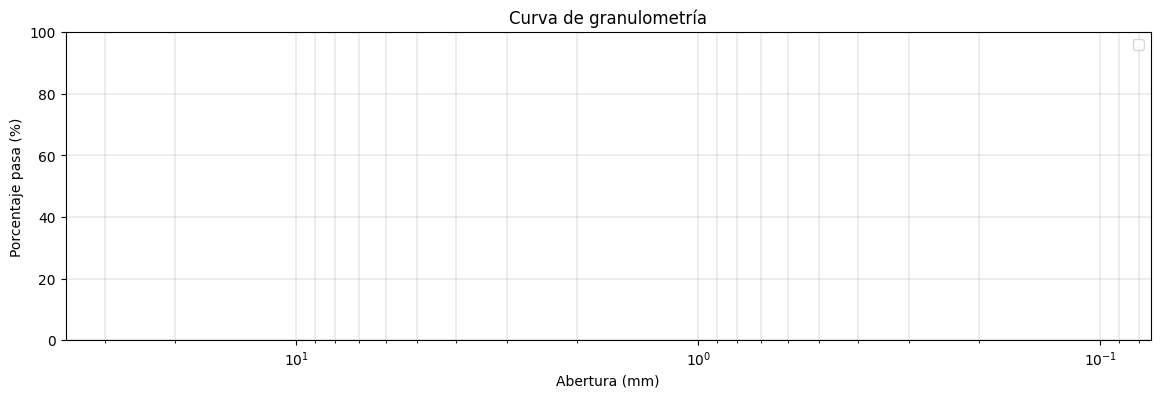

In [14]:
plt.figure(figsize=(14, 4))  # Crea una nueva figura con un tamaño específico.
plt.xlim(0.075, 37.5)        # Establece los límites del eje x de 0.075 a 37.5.
plt.ylim(0, 100)             # Establece los límites del eje y de 0 a 100.
plt.title("Curva de granulometría", fontsize=12)  # Añade el título de la gráfica con tamaño de fuente 12.
plt.xlabel("Abertura (mm)", fontsize=10, color="black")  # Añade la etiqueta del eje x con tamaño de fuente 10 y color negro.
plt.ylabel("Porcentaje pasa (%)", fontsize=10, color="black")  # Añade la etiqueta del eje y con tamaño de fuente 10 y color negro.
plt.grid(color='black', ls='-', lw=0.1, which='both')  # Muestra la grilla en la gráfica con líneas negras, sólidas y delgadas.
plt.gca().invert_xaxis()  # Invierte el eje x.
plt.xscale("log")  # Establece la escala del eje x a logarítmica.
plt.legend()  # Muestra la leyenda de la gráfica.

**Segundo paso**

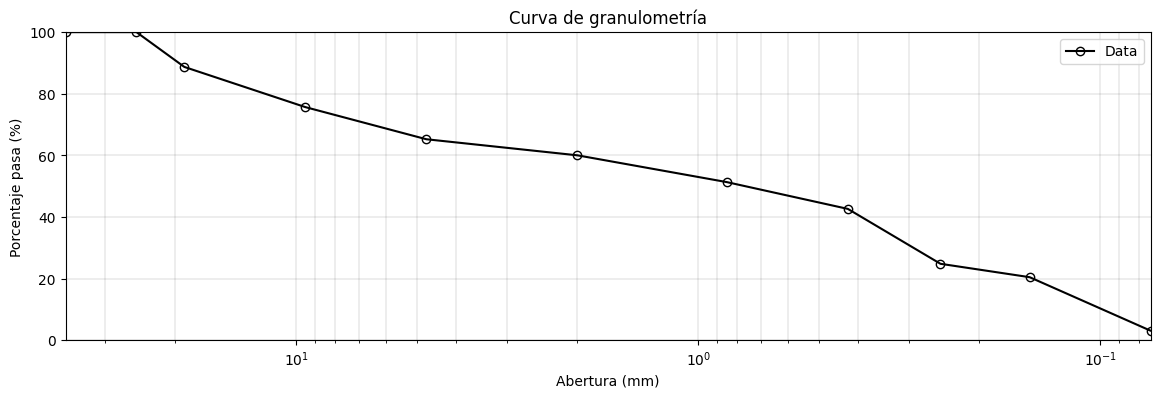

In [16]:
plt.figure(figsize=(14, 4))  # Crea una nueva figura con un tamaño específico.
plt.plot(granu["Abertura"],granu["Por_Pasa"],linestyle = '-',marker = 'o',color = 'k', fillstyle='none',label='Data')
plt.xlim(0.075, 37.5)        # Establece los límites del eje x de 0.075 a 37.5.
plt.ylim(0, 100)             # Establece los límites del eje y de 0 a 100.
plt.title("Curva de granulometría", fontsize=12)  # Añade el título de la gráfica con tamaño de fuente 12.
plt.xlabel("Abertura (mm)", fontsize=10, color="black")  # Añade la etiqueta del eje x con tamaño de fuente 10 y color negro.
plt.ylabel("Porcentaje pasa (%)", fontsize=10, color="black")  # Añade la etiqueta del eje y con tamaño de fuente 10 y color negro.
plt.grid(color='black', ls='-', lw=0.1, which='both')  # Muestra la grilla en la gráfica con líneas negras, sólidas y delgadas.
plt.gca().invert_xaxis()  # Invierte el eje x.
plt.xscale("log")  # Establece la escala del eje x a logarítmica.
plt.legend()  # Muestra la leyenda de la gráfica.

**Tercer paso**

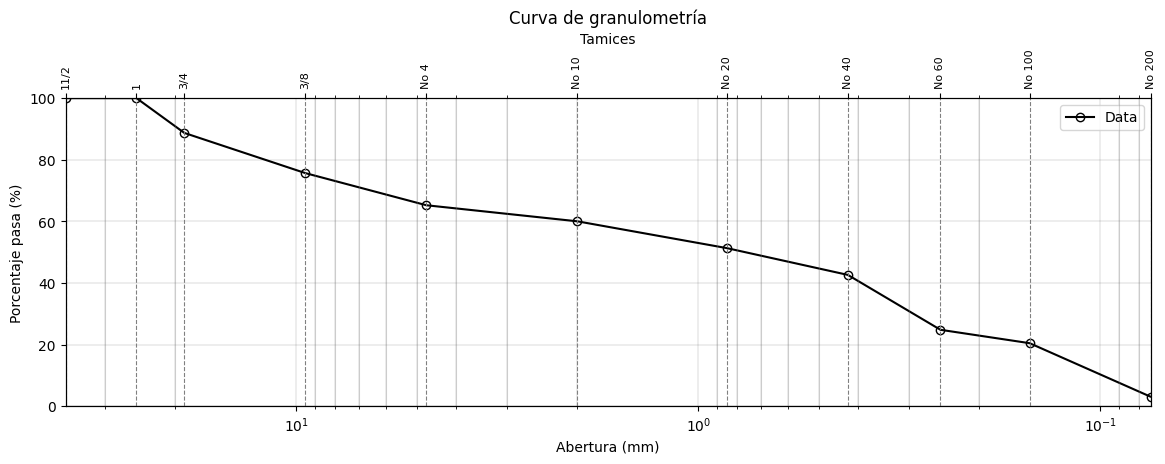

In [17]:
plt.figure(figsize=(14, 4))  # Crea una nueva figura con un tamaño específico.
plt.plot(granu["Abertura"],granu["Por_Pasa"],linestyle = '-',marker = 'o',color = 'k', fillstyle='none',label='Data')
plt.xlim(0.075, 37.5)        # Establece los límites del eje x de 0.075 a 37.5.
plt.ylim(0, 100)             # Establece los límites del eje y de 0 a 100.
plt.title("Curva de granulometría", fontsize=12)  # Añade el título de la gráfica con tamaño de fuente 12.
plt.xlabel("Abertura (mm)", fontsize=10, color="black")  # Añade la etiqueta del eje x con tamaño de fuente 10 y color negro.
plt.ylabel("Porcentaje pasa (%)", fontsize=10, color="black")  # Añade la etiqueta del eje y con tamaño de fuente 10 y color negro.
plt.grid(color='black', ls='-', lw=0.1, which='both')  # Muestra la grilla en la gráfica con líneas negras, sólidas y delgadas.
plt.gca().invert_xaxis()  # Invierte el eje x.
plt.xscale("log")  # Establece la escala del eje x a logarítmica.
plt.legend()  # Muestra la leyenda de la gráfica.
ax2 = plt.gca().twiny()  # Crea un segundo eje x compartido (gemelo) en la parte superior del gráfico.
ax2.set_xscale('log')  # Establece la escala del eje x en logarítmica para el segundo eje.
ax2.set_xticks(granu["Abertura"])  # Establece las marcas (ticks) en el eje x en los valores de la columna "Abertura" de granu.
ax2.set_xticklabels(granu["Malla"], rotation=90, fontsize=8)  # Establece las etiquetas de las marcas del eje x con los valores de la columna "Malla" de granu, rotadas 90 grados y con tamaño de fuente 8.
ax2.set_xlabel('Tamices')  # Añade la etiqueta del eje x para el segundo eje.
ax2.set_xlim(0.075, 37.5)  # Establece los límites del eje x de 0.075 a 37.5 para el segundo eje.
ax2.invert_xaxis()  # Invierte el eje x para el segundo eje.
ax2.grid(True, linestyle='-', which='minor', color='gray', alpha=0.3)  # Muestra la grilla en el segundo eje para las marcas menores con líneas grises y delgadas.
ax2.grid(True, linestyle='--', which='major', color='gray', alpha=1)  # Muestra la grilla en el segundo eje para las marcas mayores con líneas grises y discontinuas.

**Cuarto paso**

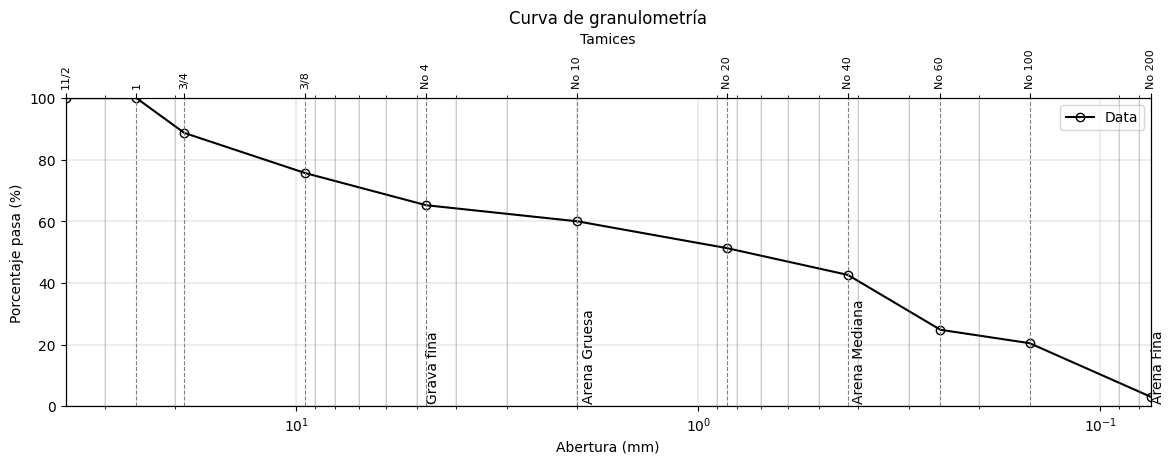

In [18]:
plt.figure(figsize=(14, 4))  # Crea una nueva figura con un tamaño específico.
plt.plot(granu["Abertura"],granu["Por_Pasa"],linestyle = '-',marker = 'o',color = 'k', fillstyle='none',label='Data')

plt.annotate('Grava fina',(4.75,2),rotation=90)
plt.annotate('Arena Gruesa',(1.95,2),rotation=90)
plt.annotate('Arena Mediana',(0.415,2),rotation=90)
plt.annotate('Arena Fina',(0.075,2),rotation=90)

plt.xlim(0.075, 37.5)        # Establece los límites del eje x de 0.075 a 37.5.
plt.ylim(0, 100)             # Establece los límites del eje y de 0 a 100.
plt.title("Curva de granulometría", fontsize=12)  # Añade el título de la gráfica con tamaño de fuente 12.
plt.xlabel("Abertura (mm)", fontsize=10, color="black")  # Añade la etiqueta del eje x con tamaño de fuente 10 y color negro.
plt.ylabel("Porcentaje pasa (%)", fontsize=10, color="black")  # Añade la etiqueta del eje y con tamaño de fuente 10 y color negro.
plt.grid(color='black', ls='-', lw=0.1, which='both')  # Muestra la grilla en la gráfica con líneas negras, sólidas y delgadas.
plt.gca().invert_xaxis()  # Invierte el eje x.
plt.xscale("log")  # Establece la escala del eje x a logarítmica.
plt.legend()  # Muestra la leyenda de la gráfica.
ax2 = plt.gca().twiny()  # Crea un segundo eje x compartido (gemelo) en la parte superior del gráfico.
ax2.set_xscale('log')  # Establece la escala del eje x en logarítmica para el segundo eje.
ax2.set_xticks(granu["Abertura"])  # Establece las marcas (ticks) en el eje x en los valores de la columna "Abertura" de granu.
ax2.set_xticklabels(granu["Malla"], rotation=90, fontsize=8)  # Establece las etiquetas de las marcas del eje x con los valores de la columna "Malla" de granu, rotadas 90 grados y con tamaño de fuente 8.
ax2.set_xlabel('Tamices')  # Añade la etiqueta del eje x para el segundo eje.
ax2.set_xlim(0.075, 37.5)  # Establece los límites del eje x de 0.075 a 37.5 para el segundo eje.
ax2.invert_xaxis()  # Invierte el eje x para el segundo eje.
ax2.grid(True, linestyle='-', which='minor', color='gray', alpha=0.3)  # Muestra la grilla en el segundo eje para las marcas menores con líneas grises y delgadas.
ax2.grid(True, linestyle='--', which='major', color='gray', alpha=1)  # Muestra la grilla en el segundo eje para las marcas mayores con líneas grises y discontinuas.

**Quinto paso**

Valor D60: 2.00
Valor D30: 0.30
Valor D10: 0.10


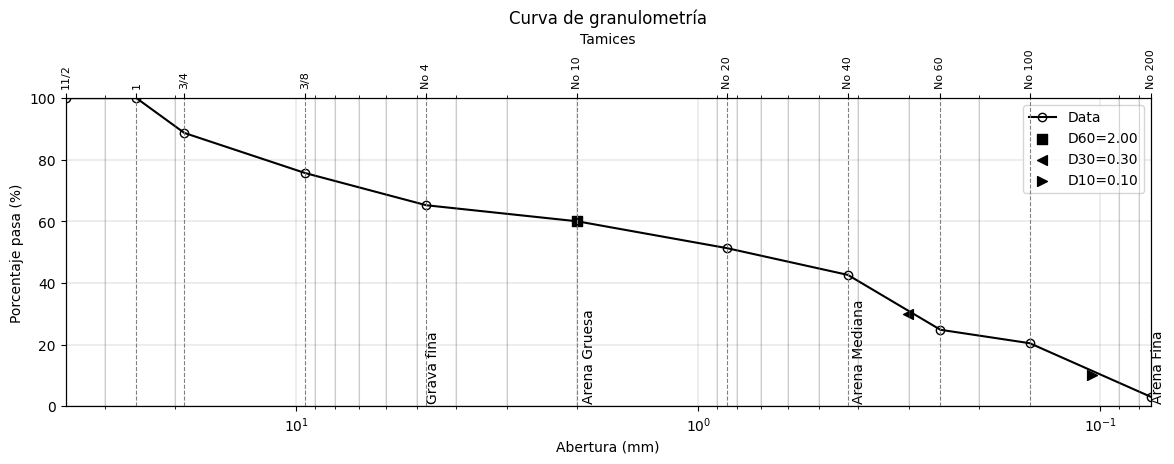

In [22]:
plt.figure(figsize=(14, 4))  # Crea una nueva figura con un tamaño específico.
plt.plot(granu["Abertura"], granu["Por_Pasa"], linestyle='-', marker='o', color='k', fillstyle='none', label='Data')
# Grafica la curva de granulometría con líneas y marcadores negros, sin relleno, y añade una etiqueta 'Data'.

f = interp1d(granu["Por_Pasa"], granu["Abertura"])
# Crea una función de interpolación lineal basada en los datos de porcentaje pasa y abertura.

y1_coord = 60  # Establece el valor y1 en 60 para encontrar la abertura correspondiente.
y2_coord = 30  # Establece el valor y2 en 30 para encontrar la abertura correspondiente.
y3_coord = 10  # Establece el valor y3 en 10 para encontrar la abertura correspondiente.

x1_coord = f(y1_coord)  # Encuentra la abertura correspondiente al porcentaje pasa de 60%.
x2_coord = f(y2_coord)  # Encuentra la abertura correspondiente al porcentaje pasa de 30%.
x3_coord = f(y3_coord)  # Encuentra la abertura correspondiente al porcentaje pasa de 10%.

x1_formatted = '{:.2f}'.format(x1_coord)  # Formatea x1 a dos decimales.
print("Valor D60:", x1_formatted)  # Imprime el valor de D60 formateado.
x2_formatted = '{:.2f}'.format(x2_coord)  # Formatea x2 a dos decimales.
print("Valor D30:", x2_formatted)  # Imprime el valor de D30 formateado.
x3_formatted = '{:.2f}'.format(x3_coord)  # Formatea x3 a dos decimales.
print("Valor D10:", x3_formatted)  # Imprime el valor de D10 formateado.

plt.scatter(x1_coord, y1_coord, marker='s', s=50, color='k', label='D60=' + x1_formatted)
# Dibuja un marcador cuadrado en (x1, y1) y añade una etiqueta con el valor de D60.
plt.scatter(x2_coord, y2_coord, marker='<', s=50, color='k', label='D30=' + x2_formatted)
# Dibuja un marcador triangular hacia la izquierda en (x2, y2) y añade una etiqueta con el valor de D30.
plt.scatter(x3_coord, y3_coord, marker='>', s=50, color='k', label='D10=' + x3_formatted)
# Dibuja un marcador triangular hacia la derecha en (x3, y3) y añade una etiqueta con el valor de D10.

plt.annotate('Grava fina', (4.75, 2), rotation=90)  # Añade la etiqueta 'Grava fina' en la coordenada (4.75, 2) con rotación de 90 grados.
plt.annotate('Arena Gruesa', (1.95, 2), rotation=90)  # Añade la etiqueta 'Arena Gruesa' en la coordenada (1.95, 2) con rotación de 90 grados.
plt.annotate('Arena Mediana', (0.415, 2), rotation=90)  # Añade la etiqueta 'Arena Mediana' en la coordenada (0.415, 2) con rotación de 90 grados.
plt.annotate('Arena Fina', (0.075, 2), rotation=90)  # Añade la etiqueta 'Arena Fina' en la coordenada (0.075, 2) con rotación de 90 grados.

plt.xlim(0.075, 37.5)        # Establece los límites del eje x de 0.075 a 37.5.
plt.ylim(0, 100)             # Establece los límites del eje y de 0 a 100.
plt.title("Curva de granulometría", fontsize=12)  # Añade el título de la gráfica con tamaño de fuente 12.
plt.xlabel("Abertura (mm)", fontsize=10, color="black")  # Añade la etiqueta del eje x con tamaño de fuente 10 y color negro.
plt.ylabel("Porcentaje pasa (%)", fontsize=10, color="black")  # Añade la etiqueta del eje y con tamaño de fuente 10 y color negro.
plt.grid(color='black', ls='-', lw=0.1, which='both')  # Muestra la grilla en la gráfica con líneas negras, sólidas y delgadas.
plt.gca().invert_xaxis()  # Invierte el eje x.
plt.xscale("log")  # Establece la escala del eje x a logarítmica.
plt.legend()  # Muestra la leyenda de la gráfica.
ax2 = plt.gca().twiny()  # Crea un segundo eje x compartido (gemelo) en la parte superior del gráfico.
ax2.set_xscale('log')  # Establece la escala del eje x en logarítmica para el segundo eje.
ax2.set_xticks(granu["Abertura"])  # Establece las marcas (ticks) en el eje x en los valores de la columna "Abertura" de granu.
ax2.set_xticklabels(granu["Malla"], rotation=90, fontsize=8)  # Establece las etiquetas de las marcas del eje x con los valores de la columna "Malla" de granu, rotadas 90 grados y con tamaño de fuente 8.
ax2.set_xlabel('Tamices')  # Añade la etiqueta del eje x para el segundo eje.
ax2.set_xlim(0.075, 37.5)  # Establece los límites del eje x de 0.075 a 37.5 para el segundo eje.
ax2.invert_xaxis()  # Invierte el eje x para el segundo eje.
ax2.grid(True, linestyle='-', which='minor', color='gray', alpha=0.3)  # Muestra la grilla en el segundo eje para las marcas menores con líneas grises y delgadas.
ax2.grid(True, linestyle='--', which='major', color='gray', alpha=1)  # Muestra la grilla en el segundo eje para las marcas mayores con líneas grises y discontinuas.

**Obtener Cu y CC**

In [23]:
cu=round(x1_coord/x3_coord,3) #coeficiente de uniformidad
cc=round(x2_coord**2/(x1_coord*x3_coord),3) #coeficiente de curvatura
print("Cu:", cu) # Imprime el coeficiente de uniformidad
print("Cc:", cc) # Imprime el coeficiente de curvatura

Cu: 19.048
Cc: 0.432
